### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.
* Las imágenes se encuentran en una carpeta con el nombre album_covers.
* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg


El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.
Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas, numpy y matplotlib.pyplot.
* sklearn.cluster.KMeans: para extraer los principales componentes de una matriz numérica.
* skimage.io:Para poder ingresar y leer imágenes.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

import warnings
warnings.filterwarnings(action="ignore")

### Desafío 2: Importación de imágenes
* Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread. ¿Qué devuelve?
* Para visualizar la imágen en el notebook, ocupe io.imshow.

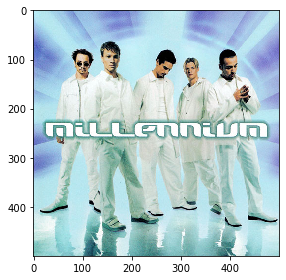

In [56]:
image = io.imread('./album_covers/backstreet-boys-millenium.jpg') # devuelve un array de 3 dimensiones
io.imshow(image)

### Desafío 3: Preprocesamiento de imágenes y KMeans

* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante shape.
* Posteriormente redimensionaremos la imágen con reshape.
* Partamos por inicializar nuestro algoritmo con un k=8, ¿Qué significa esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans. ¿Qué diferencia existe con KMeans?

In [57]:
image.shape

(500, 500, 3)

In [58]:
image = image.reshape([-1,3]) 

In [59]:
kmeans = KMeans(n_clusters=8, random_state=1234) #K= 8 significa 8 grupos a identificar
fit_results = kmeans.fit_predict(image)

In [60]:
kmeansb = MiniBatchKMeans(n_clusters=8, random_state=1234)
fit_results2 = kmeansb.fit_predict(image)
#la diferencia es que MiniBatchKmeans es mas eficiente.

### Desafío 4: Extracción de valores
* Ahora extraemos las etiquetas predichas con labels_. Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en estos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilizamos el atributo cluster_centers_.
* Con las etiquetas, generamos un conteo de ocurrencia con np.unique. Para extraer el conteo, debemos implementar la opción return_counts=True.

In [61]:
kmeans.labels_

array([3, 3, 5, ..., 3, 3, 5], dtype=int32)

In [62]:
pd.Series(kmeans.labels_).value_counts('%')

5    0.272284
3    0.165996
1    0.164392
6    0.132620
0    0.123124
4    0.061628
7    0.057204
2    0.022752
dtype: float64

In [63]:
kmeans.cluster_centers_

array([[143.62649386, 180.83219903, 168.92448468],
       [197.80430552, 210.32768183, 201.61016784],
       [ 20.35004398,  23.59841689,  26.01407212],
       [159.34270798, 197.22328345, 223.35880287],
       [ 91.87836257, 134.18375569, 125.11890838],
       [188.42262971, 229.52114103, 238.36616555],
       [234.13732469, 240.78606545, 238.85721611],
       [128.78480835, 146.67423446, 210.12928316]])

In [64]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/image.shape[0]
percentages

array([0.123124, 0.164392, 0.022752, 0.165996, 0.061628, 0.272284,
       0.13262 , 0.057204])

### Desafío 5: Conversión rgb a hex
* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [65]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

In [66]:

hex = pd.Series(map(rgb_to_hex, kmeans.cluster_centers_.astype(int)))
hex

0    #8fb4a8
1    #c5d2c9
2    #14171a
3    #9fc5df
4    #5b867d
5    #bce5ee
6    #eaf0ee
7    #8092d2
dtype: object

### Desafío 6: Definición de base
Ahora generamos un DataFrame con las siguientes variables:
* El color hex.
* La ocurrencia del color en cada pixel count.
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_.

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [67]:
df_base = pd.DataFrame()

In [68]:
df_base['hex'] = hex
#df_base['occurence'] = percentages
df_base['percentaje'] = percentages

In [69]:
df_base= df_base.sort_values('percentaje')

### Desafío 7: Visualización
Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar coloreadas con el color inferido.

<AxesSubplot:xlabel='hex'>

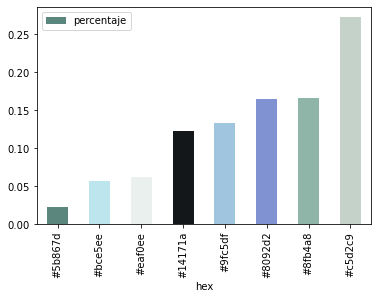

In [54]:
df_base.plot(x ='hex', y='percentaje', kind = 'bar', color=df_base['hex'])